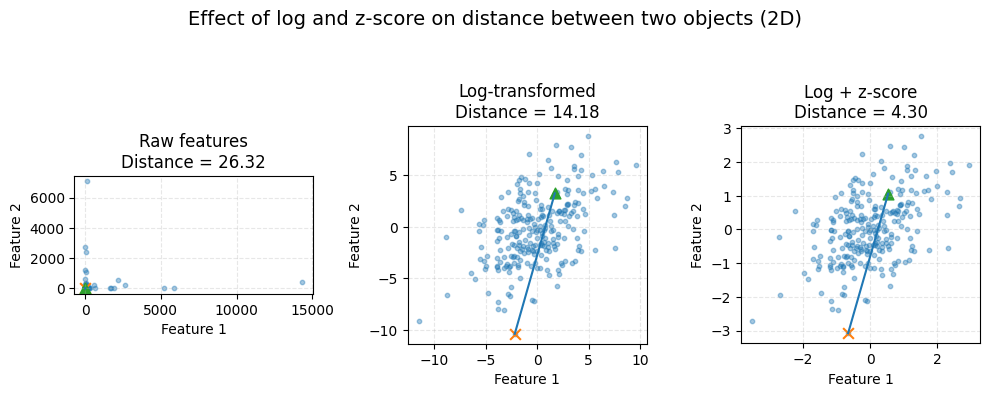

In [10]:
import numpy as np
import matplotlib.pyplot as plt

# Generate skewed 2D data (lognormal)
np.random.seed(25)
n = 250
Sigma = np.array([[10, 5],
                  [5, 10]])
mu = np.array([0, 0])
Z = np.random.multivariate_normal(mu, Sigma, n)
X_raw = np.exp(Z)  # positive, skewed

# Pick two typical objects
i1, i2 = 10, 80
p1_raw = X_raw[i1]
p2_raw = X_raw[i2]

# Log-transform
X_log = np.log(X_raw)
p1_log = X_log[i1]
p2_log = X_log[i2]

# Z-score on log
X_log_z = (X_log - X_log.mean(axis=0)) / X_log.std(axis=0)
p1_z = X_log_z[i1]
p2_z = X_log_z[i2]

# Distances
d_raw = np.linalg.norm(p1_raw - p2_raw)
d_log = np.linalg.norm(p1_log - p2_log)
d_z = np.linalg.norm(p1_z - p2_z)

# Create plots
fig, axes = plt.subplots(1, 3, figsize=(10, 4))

titles = [
    f"Raw features\nDistance = {d_raw:.2f}",
    f"Log-transformed\nDistance = {d_log:.2f}",
    f"Log + z-score\nDistance = {d_z:.2f}"
]

datasets = [(X_raw, p1_raw, p2_raw),
            (X_log, p1_log, p2_log),
            (X_log_z, p1_z, p2_z)]

for ax, (X, p1, p2), title in zip(axes, datasets, titles):
    ax.scatter(X[:, 0], X[:, 1], s=10, alpha=0.4)
    ax.scatter([p1[0]], [p1[1]], s=60, marker='x')  # site A
    ax.scatter([p2[0]], [p2[1]], s=60, marker='^')  # site B
    ax.plot([p1[0], p2[0]], [p1[1], p2[1]])         # distance segment
    ax.set_title(title)
    ax.set_xlabel("Feature 1")
    ax.set_ylabel("Feature 2")
    ax.set_aspect('equal', 'box')
    ax.grid(True, linestyle='--', alpha=0.3)

fig.suptitle("Effect of log and z-score on distance between two objects (2D)", fontsize=14)
fig.tight_layout(rect=[0, 0, 1, 0.92])
plt.show()


Original vectors angles (radians): 0.5883, 1.4934
Normalized vectors angles (radians): 0.5883, 1.4934
Original vectors angles (degrees): 33.71°, 85.56°
Normalized vectors angles (degrees): 33.71°, 85.56°


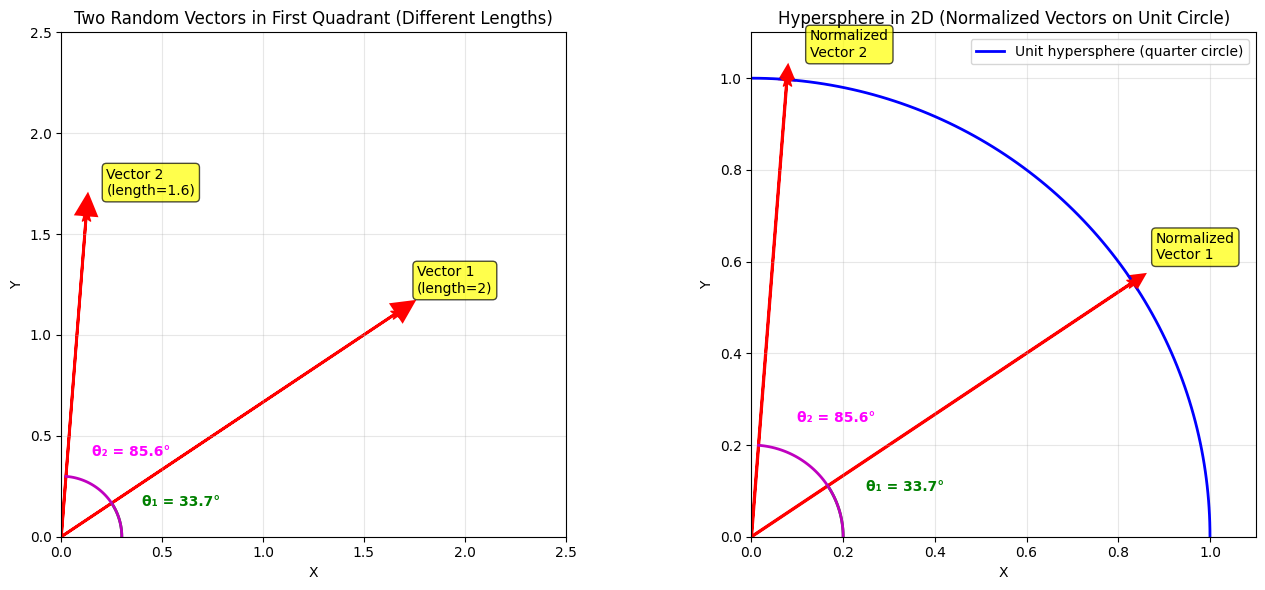

In [20]:
# Create a quarter circle (hypersphere in 2D) with unit radius
import numpy as np
import matplotlib.pyplot as plt
theta = np.linspace(0, np.pi/2, 100)  # Angle from 0 to π/2 for quarter circle
x_circle = np.cos(theta)
y_circle = np.sin(theta)
# Generate two random vectors in the first quadrant (0 to π/2)
np.random.seed(42)
angles = np.random.uniform(0, np.pi/2, 2)  # Two random angles in first quadrant

# Vector lengths (before normalization)
lengths = [2, 1.6]

# Calculate vector endpoints before normalization
vector_ends_x = [length * np.cos(angle) for length, angle in zip(lengths, angles)]
vector_ends_y = [length * np.sin(angle) for length, angle in zip(lengths, angles)]

# Calculate normalized vector endpoints (on unit circle)
arrow_ends_x = [np.cos(angle) for angle in angles]
arrow_ends_y = [np.sin(angle) for angle in angles]

# Create a figure with two subplots side by side
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(14, 6))

# Left panel: Two random vectors with different lengths in first quadrant
for i, (end_x, end_y, length) in enumerate(zip(vector_ends_x, vector_ends_y, lengths)):
    ax1.arrow(0, 0, end_x, end_y, head_width=0.1, head_length=0.1, 
              fc='red', ec='red', linewidth=2)
    ax1.scatter(end_x, end_y, s=100, marker='*', c='red', zorder=5)
    ax1.text(end_x + 0.1, end_y + 0.1, f'Vector {i+1}\n(length={length})', fontsize=10, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

ax1.set_xlim(0, 2.5)
ax1.set_ylim(0, 2.5)
ax1.set_xlabel('X')
ax1.set_ylabel('Y')
ax1.set_title('Two Random Vectors in First Quadrant (Different Lengths)')
ax1.grid(True, alpha=0.3)
ax1.set_aspect('equal')

# Right panel: Quarter circle (hypersphere) with normalized vectors
ax2.plot(x_circle, y_circle, 'b-', linewidth=2, label='Unit hypersphere (quarter circle)')

# Add two normalized vectors pointing to the circle
for i, (end_x, end_y) in enumerate(zip(arrow_ends_x, arrow_ends_y)):
    ax2.arrow(0, 0, end_x, end_y, head_width=0.03, head_length=0.03, 
              fc='red', ec='red', linewidth=2)
    ax2.scatter(end_x, end_y, s=100, marker='*', c='red', zorder=5)
    ax2.text(end_x + 0.05, end_y + 0.05, f'Normalized\nVector {i+1}', fontsize=10, 
             bbox=dict(boxstyle="round,pad=0.3", facecolor="yellow", alpha=0.7))

# Calculate angles for original vectors
angle1_original = np.arctan2(vector_ends_y[0], vector_ends_x[0])
angle2_original = np.arctan2(vector_ends_y[1], vector_ends_x[1])

# Calculate angles for normalized vectors (these should be the same as the original angles)
angle1_normalized = np.arctan2(arrow_ends_y[0], arrow_ends_x[0])
angle2_normalized = np.arctan2(arrow_ends_y[1], arrow_ends_x[1])

# Add angle arcs and labels to left panel (original vectors)
angle_radius_left = 0.3
angle1_arc = np.linspace(0, angle1_original, 50)
angle2_arc = np.linspace(0, angle2_original, 50)

ax1.plot(angle_radius_left * np.cos(angle1_arc), angle_radius_left * np.sin(angle1_arc), 'g-', linewidth=2)
ax1.plot(angle_radius_left * np.cos(angle2_arc), angle_radius_left * np.sin(angle2_arc), 'm-', linewidth=2)
ax1.text(0.4, 0.15, f'θ₁ = {np.degrees(angle1_original):.1f}°', fontsize=10, color='green', fontweight='bold')
ax1.text(0.15, 0.4, f'θ₂ = {np.degrees(angle2_original):.1f}°', fontsize=10, color='magenta', fontweight='bold')

# Add angle arcs and labels to right panel (normalized vectors)
angle_radius_right = 0.2
ax2.plot(angle_radius_right * np.cos(angle1_arc), angle_radius_right * np.sin(angle1_arc), 'g-', linewidth=2)
ax2.plot(angle_radius_right * np.cos(angle2_arc), angle_radius_right * np.sin(angle2_arc), 'm-', linewidth=2)
ax2.text(0.25, 0.1, f'θ₁ = {np.degrees(angle1_normalized):.1f}°', fontsize=10, color='green', fontweight='bold')
ax2.text(0.1, 0.25, f'θ₂ = {np.degrees(angle2_normalized):.1f}°', fontsize=10, color='magenta', fontweight='bold')

print(f"Original vectors angles (radians): {angle1_original:.4f}, {angle2_original:.4f}")
print(f"Normalized vectors angles (radians): {angle1_normalized:.4f}, {angle2_normalized:.4f}")
print(f"Original vectors angles (degrees): {np.degrees(angle1_original):.2f}°, {np.degrees(angle2_original):.2f}°")
print(f"Normalized vectors angles (degrees): {np.degrees(angle1_normalized):.2f}°, {np.degrees(angle2_normalized):.2f}°")
ax2.set_xlim(0, 1.1)
ax2.set_ylim(0, 1.1)
ax2.set_xlabel('X')
ax2.set_ylabel('Y')
ax2.set_title('Hypersphere in 2D (Normalized Vectors on Unit Circle)')
ax2.grid(True, alpha=0.3)
ax2.legend()
ax2.set_aspect('equal')

plt.tight_layout()
plt.show()